In [2]:
%matplotlib inline

Detailed Interpolating Points {#interpolate_example}
=============================

This example uses `pyvista.DataSetFilters.interpolate`{.interpreted-text
role="func"}. `pyvista.DataObjectFilters.sample`{.interpreted-text
role="func"} is similar, and the two methods are compared in
`interpolate_sample_example`{.interpreted-text role="ref"}.

Interpolate one mesh\'s point/cell arrays onto another mesh\'s nodes
using a Gaussian Kernel.


In [3]:
from __future__ import annotations

import pyvista as pv
from pyvista import examples

Simple Surface Interpolation
============================

Resample the points\' arrays onto a surface


/home/rwright/rocket-flutter-speed-analysis/venv/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


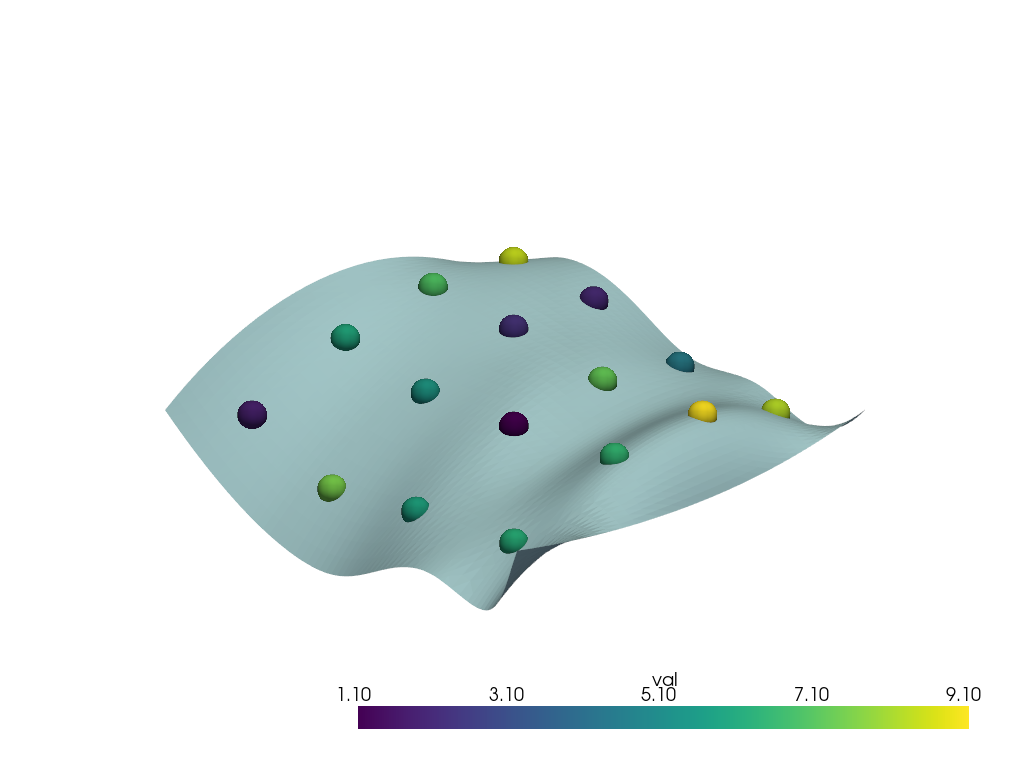

In [4]:
# Download sample data
surface = examples.download_saddle_surface()
points = examples.download_sparse_points()

p = pv.Plotter()
p.add_mesh(points, scalars='val', point_size=30.0, render_points_as_spheres=True)
p.add_mesh(surface)
p.show()

Run the interpolation


/home/rwright/rocket-flutter-speed-analysis/venv/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


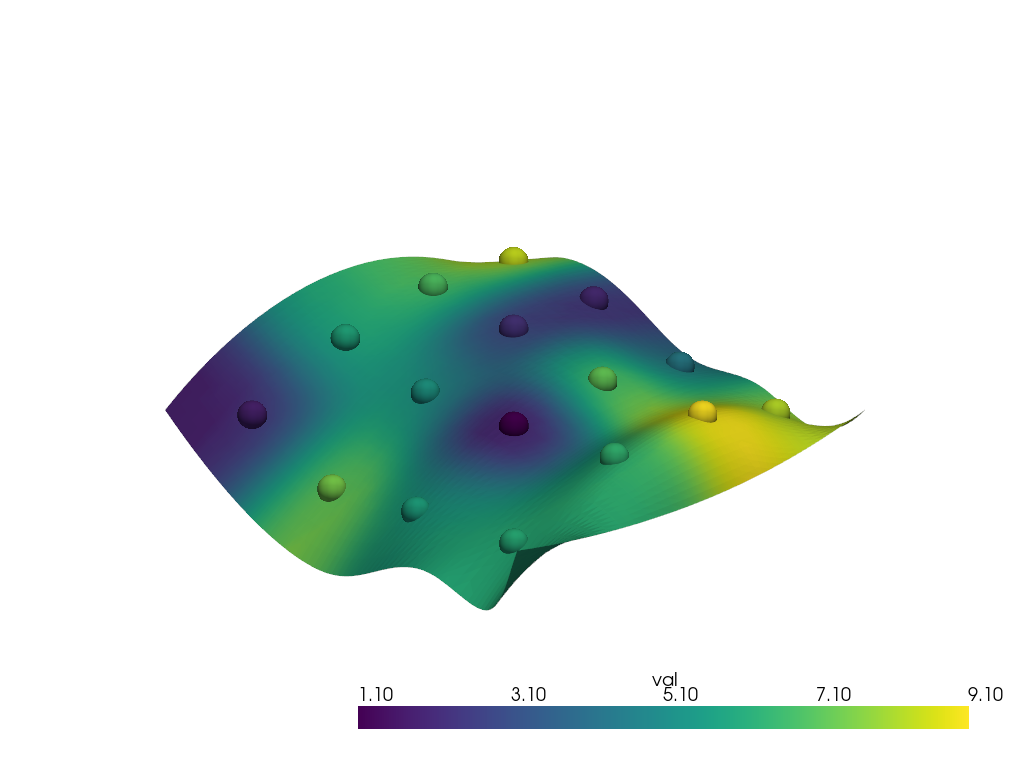

In [5]:
interpolated = surface.interpolate(points, radius=12.0)


p = pv.Plotter()
p.add_mesh(points, scalars='val', point_size=30.0, render_points_as_spheres=True)
p.add_mesh(interpolated, scalars='val')
p.show()

Complex Interpolation
=====================

In this example, we will in interpolate sparse points in 3D space into a
volume. These data are from temperature probes in the subsurface and the
goal is to create an approximate 3D model of the temperature field in
the subsurface.

This approach is a great for back-of-the-hand estimations but pales in
comparison to kriging


In [6]:
# Download the sparse data
probes = examples.download_thermal_probes()

Create the interpolation grid around the sparse data


In [7]:
grid = pv.ImageData()
grid.origin = (329700, 4252600, -2700)
grid.spacing = (250, 250, 50)
grid.dimensions = (60, 75, 100)

/home/rwright/rocket-flutter-speed-analysis/venv/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


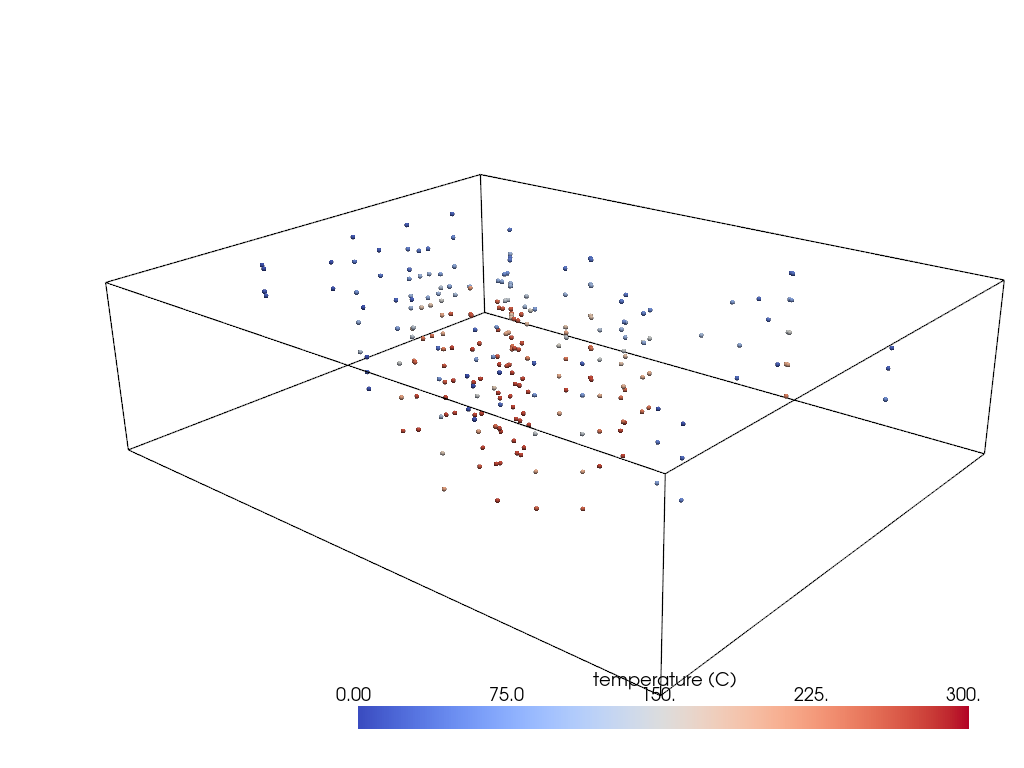

In [8]:
dargs = dict(cmap='coolwarm', clim=[0, 300], scalars='temperature (C)')
cpos = [
    (364280.5723737897, 4285326.164400684, 14093.431895014139),
    (337748.7217949739, 4261154.45054595, -637.1092549935128),
    (-0.29629216102673206, -0.23840196609932093, 0.9248651025279784),
]

p = pv.Plotter()
p.add_mesh(grid.outline(), color='k')
p.add_mesh(probes, render_points_as_spheres=True, **dargs)
p.show(cpos=cpos)

Run an interpolation


In [9]:
interp = grid.interpolate(probes, radius=15000, sharpness=10, strategy='mask_points')

Visualize the results


/home/rwright/rocket-flutter-speed-analysis/venv/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


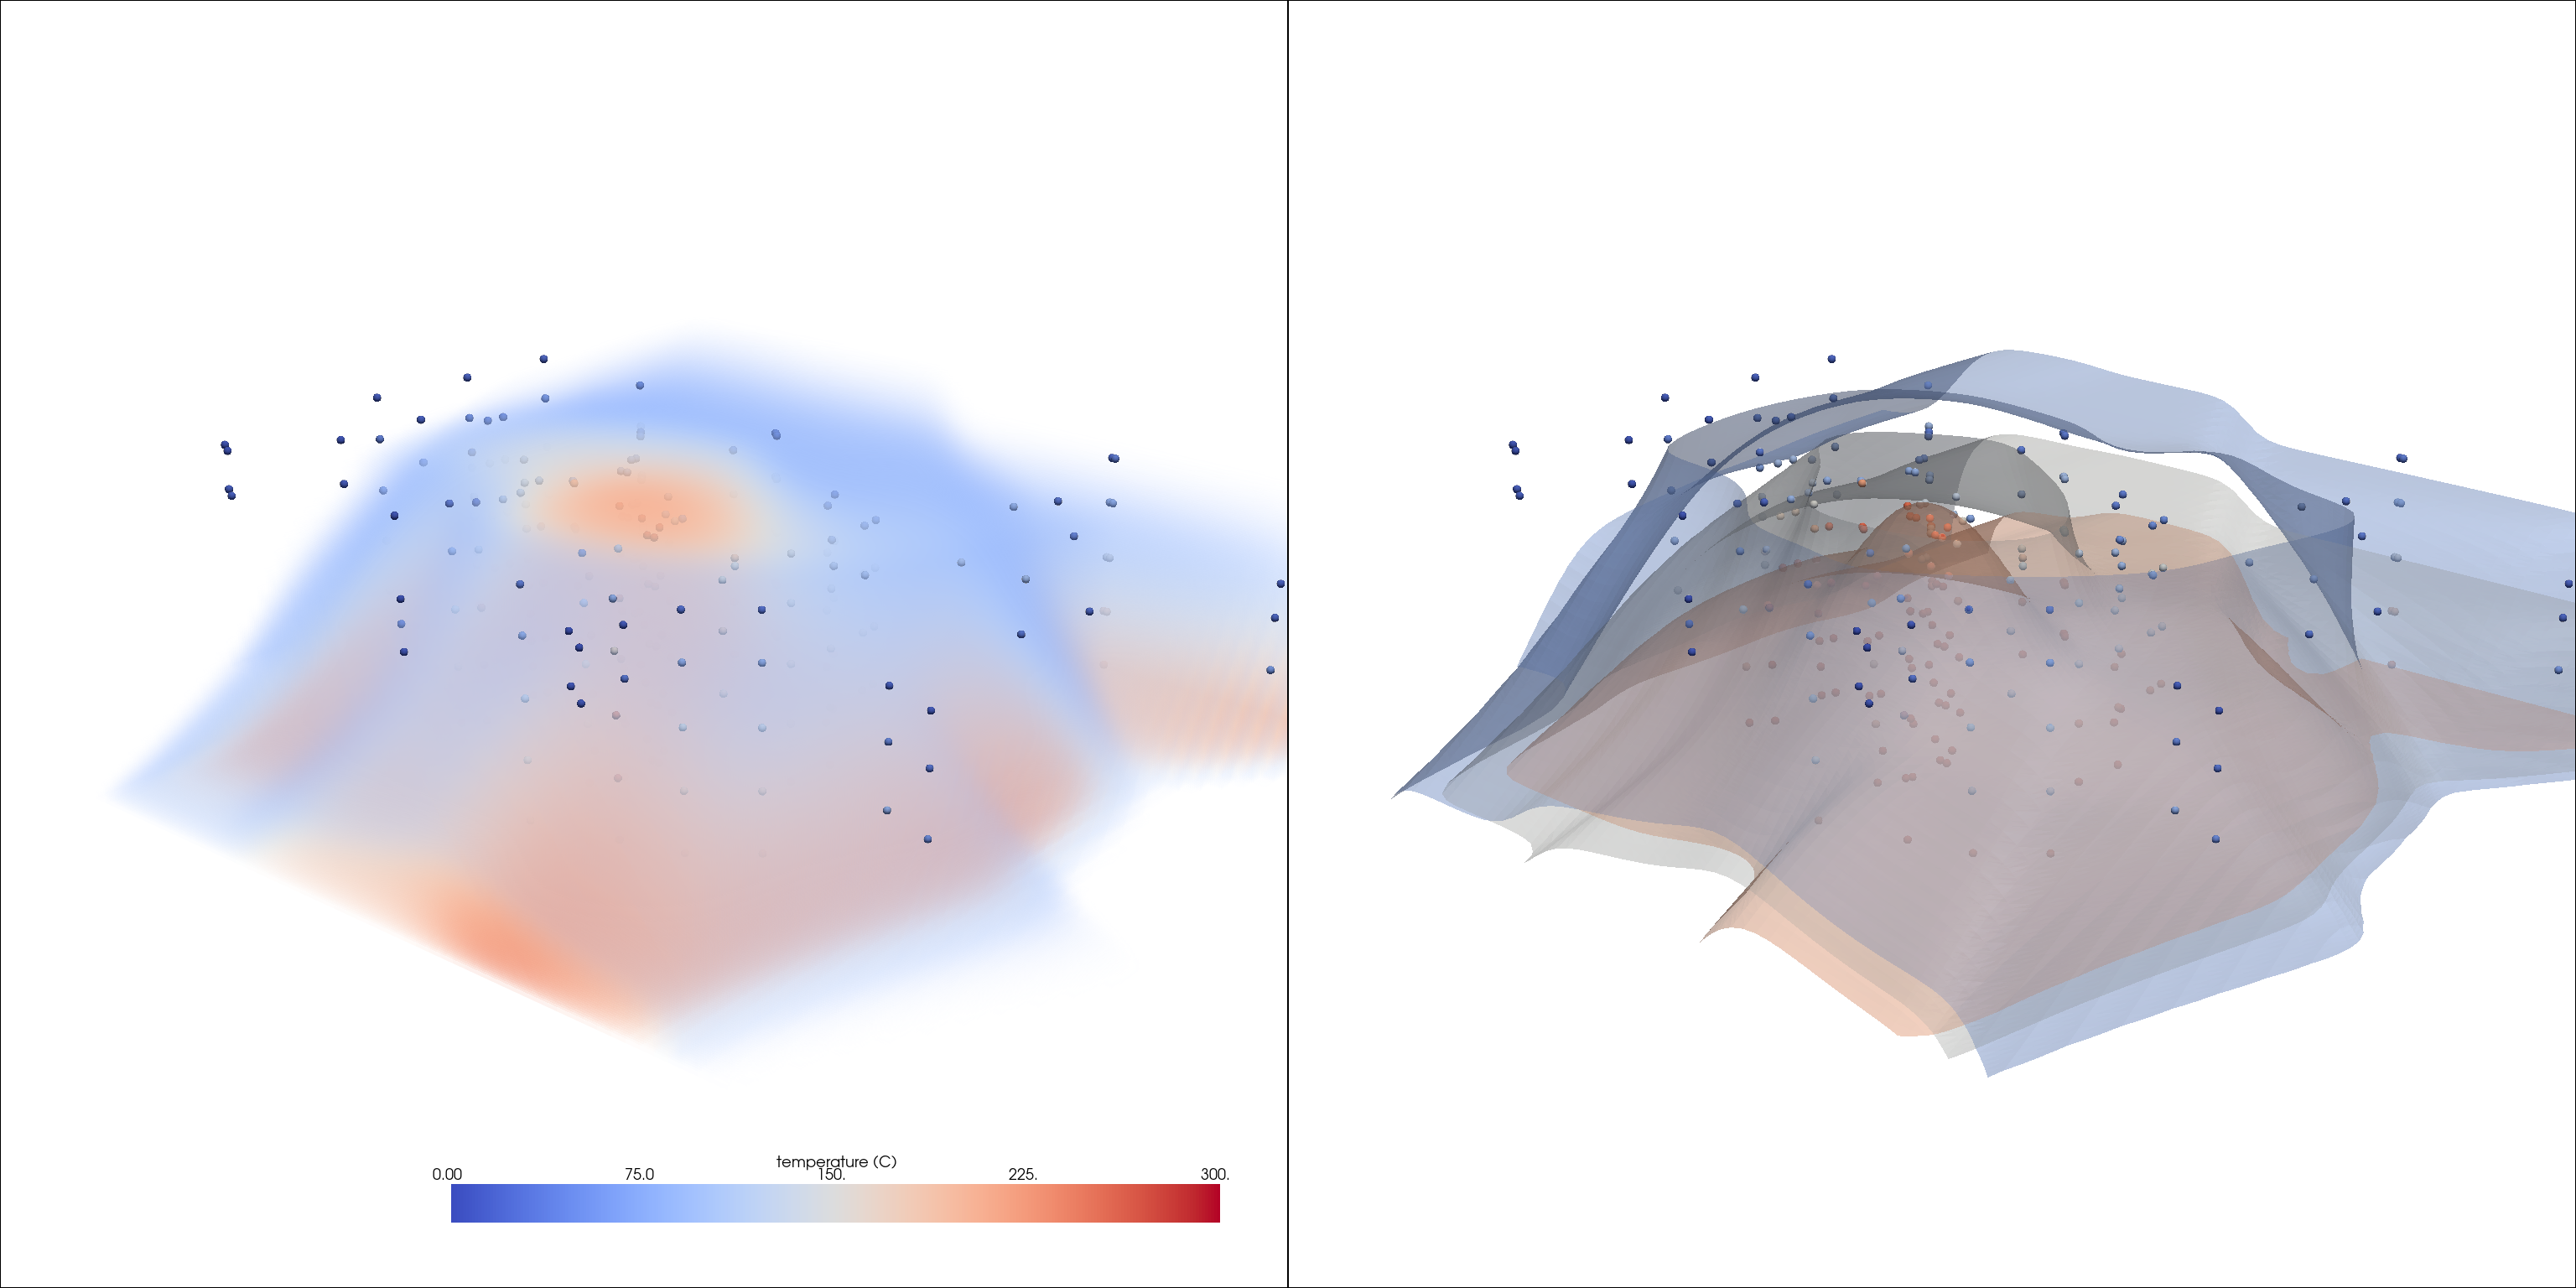

In [10]:
vol_opac = [0, 0, 0.2, 0.2, 0.5, 0.5]

p = pv.Plotter(shape=(1, 2), window_size=[1024 * 3, 768 * 2])
p.add_volume(interp, opacity=vol_opac, **dargs)
p.add_mesh(probes, render_points_as_spheres=True, point_size=10, **dargs)
p.subplot(0, 1)
p.add_mesh(interp.contour(5), opacity=0.5, **dargs)
p.add_mesh(probes, render_points_as_spheres=True, point_size=10, **dargs)
p.link_views()
p.show(cpos=cpos)

::: {.tags}
filter
:::
